# Exploratory Data Analysis: eCommerce behavior data from multi category store

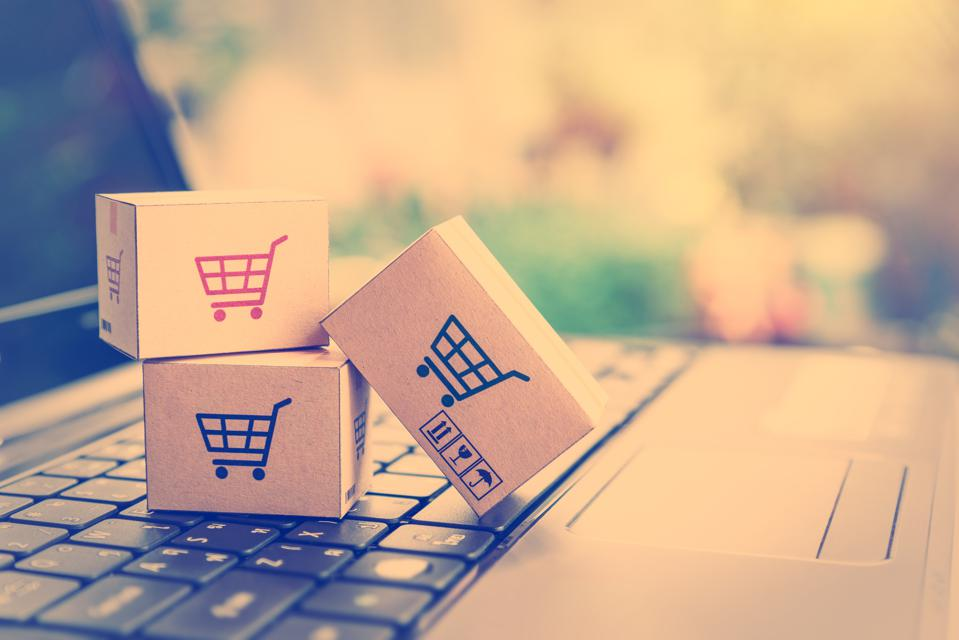

The link to this dataset is: https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

The original source is from: https://rees46.com/

In this notebook I want to explore this data set from kaggle and find trending products that have been purcahes from multi category stores.

Questions I want to answer:
 - What are the highest purchased products from all months.
 - What month racked up the most purchases.
 - What are the cheapest products and the most expensive products from the data.
 - What time of the day do people like to purchase their products.
 - What products have a big influence on the market they're in.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

"""
Because the datasets are very large (more than 10million entries each!) 
I'm using spark to read in the data set as it is made for big data.
"""
sqlCtx = SQLContext(sc)

months = {}
months['december'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Dec.csv', header=True)
months['november'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Nov.csv', header=True)
months['october'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Oct.csv', header=True)
months['april'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Apr.csv', header=True)
months['february'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Feb.csv', header=True)
months['january'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Jan.csv', header=True)
months['march'] = sqlCtx.read.csv(r'C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Mar.csv', header=True)

C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Dec.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Nov.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2019-Oct.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Apr.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Feb.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Jan.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\2020-Mar.csv
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\Untitled.ipynb
C:\Users\Israel Adelaja\Downloads\Ecommerce Data\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [2]:
#Filtering spark dataframes to only include purcahse event types then converting spark dataframes to pandas dataframes.
for month, data in months.items():
    months[month] = months[month].filter(data.event_type == "purchase").toPandas()

In [3]:
#I've noticed some of the category codes are null so i'll have to drop these rows are I can't use them.
for month, data in months.items():
    months[month] = data.dropna(subset=['category_code'])

### Data Preprocessing

In [4]:
import datetime as dt

def split_category(c_code):
    return c_code.split('.')[-1]

def convert_date(date):
    date = date.replace(' UTC','')
    new_date = dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return new_date

In [5]:
for month, data in months.items():
    months[month]['subcategory'] = data['category_code'].apply(lambda x: split_category(x))
    months[month]['event_time'] = data['event_time'].apply(lambda x: convert_date(x))
    months[month]['price'] = data['price'].apply(lambda x: float(x))

In [6]:
months['april'].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,subcategory
0,2020-04-01 00:00:48,purchase,100177859,2053013551932506308,construction.tools.drill,s.oliver,60.49,633281427,667a8535-221c-4169-aab4-a1972610f102,drill
1,2020-04-01 00:02:13,purchase,1801503,2232732099754852875,appliances.personal.massager,xiaomi,203.09,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,massager
3,2020-04-01 00:02:22,purchase,21400996,2232732082063278200,electronics.clocks,casio,80.42,633281427,667a8535-221c-4169-aab4-a1972610f102,clocks
4,2020-04-01 00:03:46,purchase,1307058,2053013554658804075,electronics.audio.headphone,apple,"1,415.43",513685353,13497a8c-32b3-4920-a526-d93a23e0a43b,headphone
5,2020-04-01 00:03:48,purchase,24100262,2232732100954423843,appliances.personal.massager,None,6.01,513094047,d27f822c-f707-4956-a6c3-4ad8fec00cc7,massager


### Visualizing Data

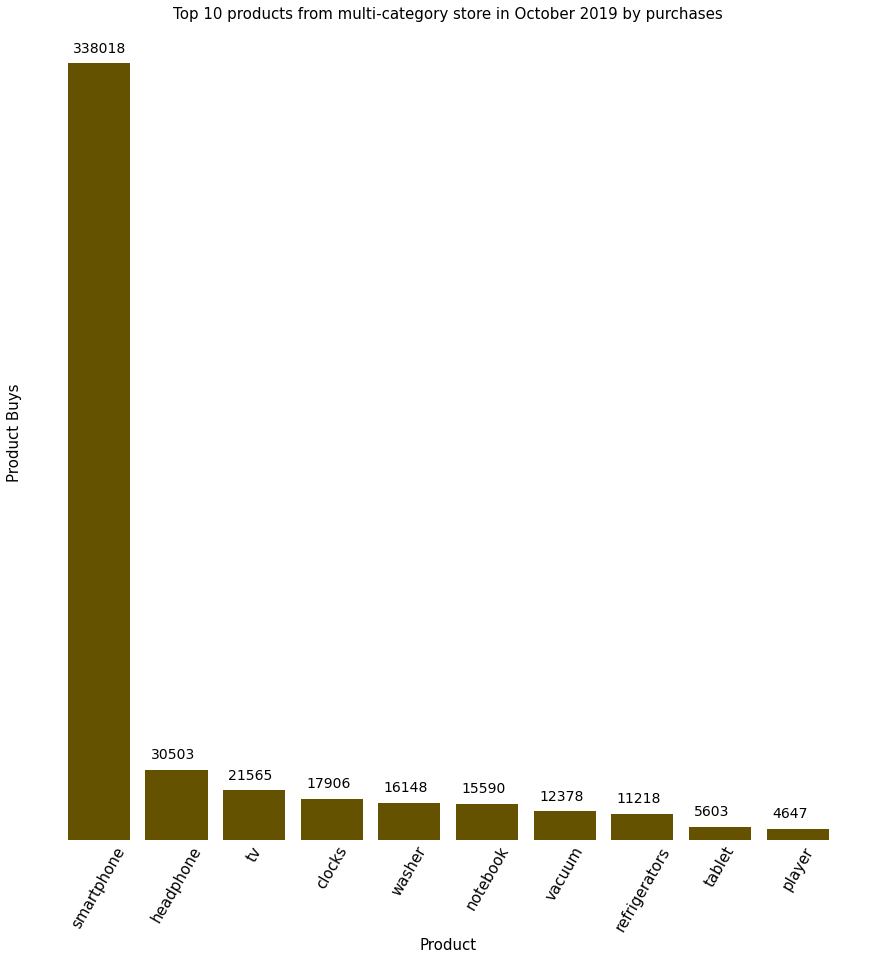

In [7]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['october']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(100/255, 82/255, 0/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in October 2019 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

It's not surprising to see smartphones leading drastically as almost everyone in the world has one now. With headphones in second place and tv's in third place.

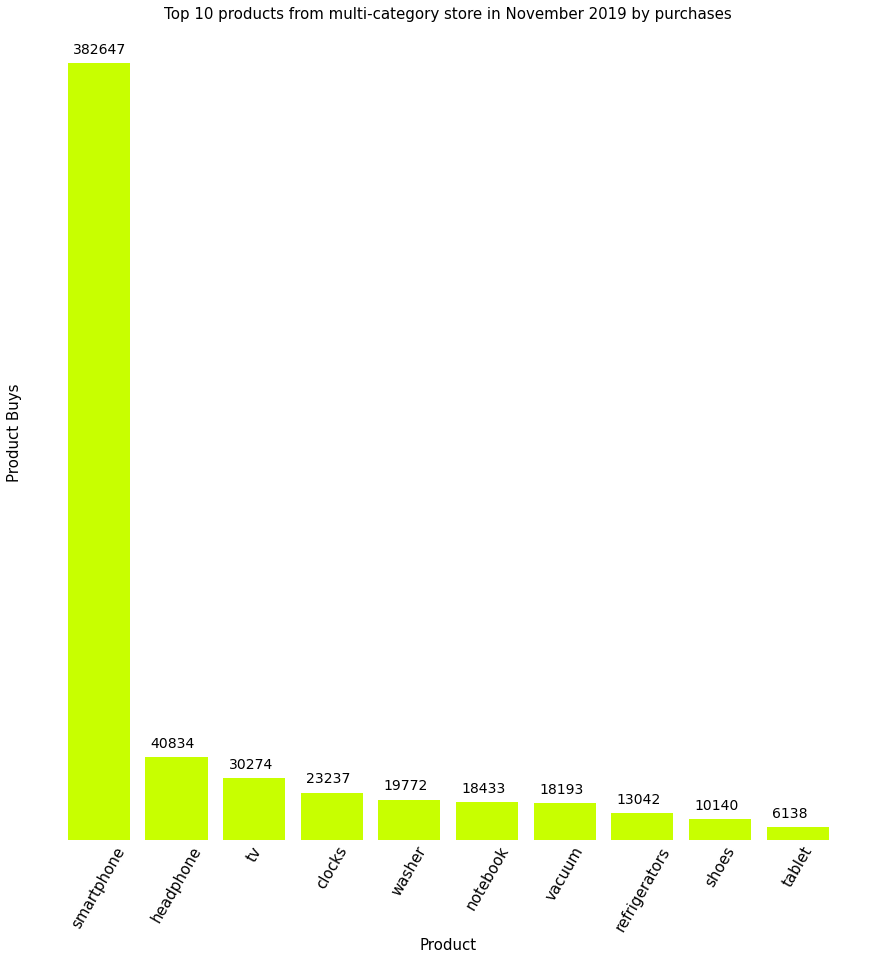

In [8]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['november']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(200/255, 255/255, 0/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in November 2019 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

Also the same result for this month.

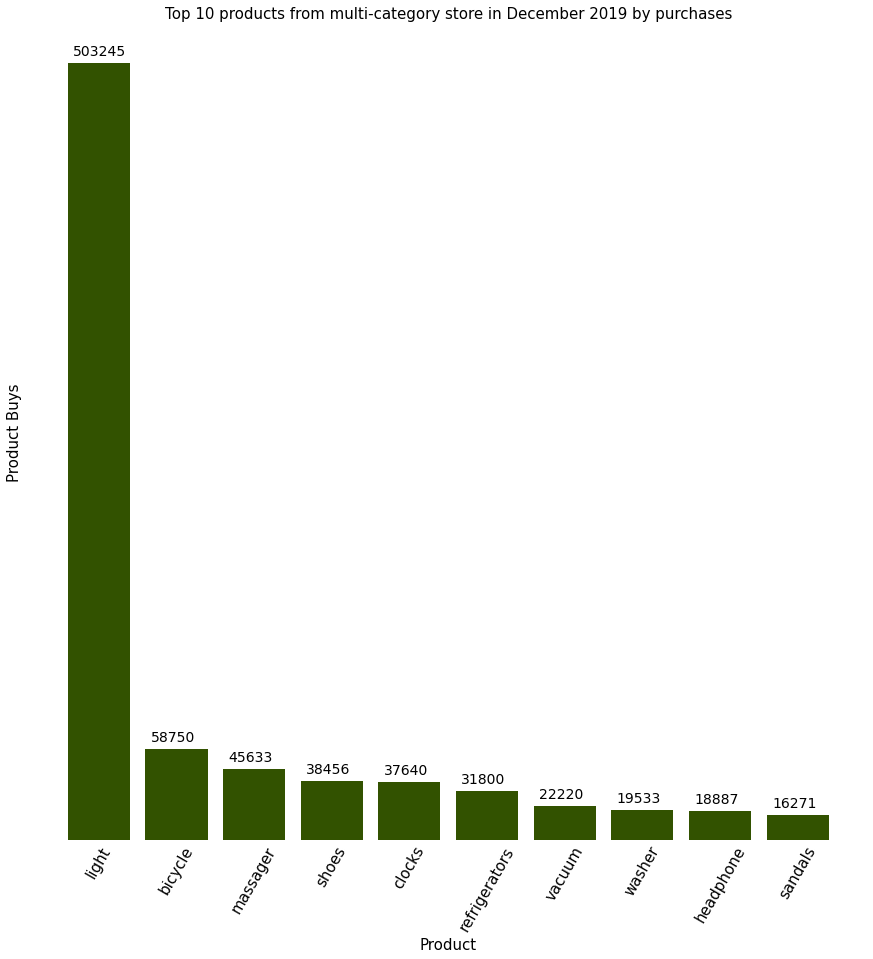

In [9]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['december']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(50/255, 82/255, 0/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in December 2019 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

WOW! Did not expect that. Where did smartphones go? and look at lights! and it continues like this throughout the rest of the data!

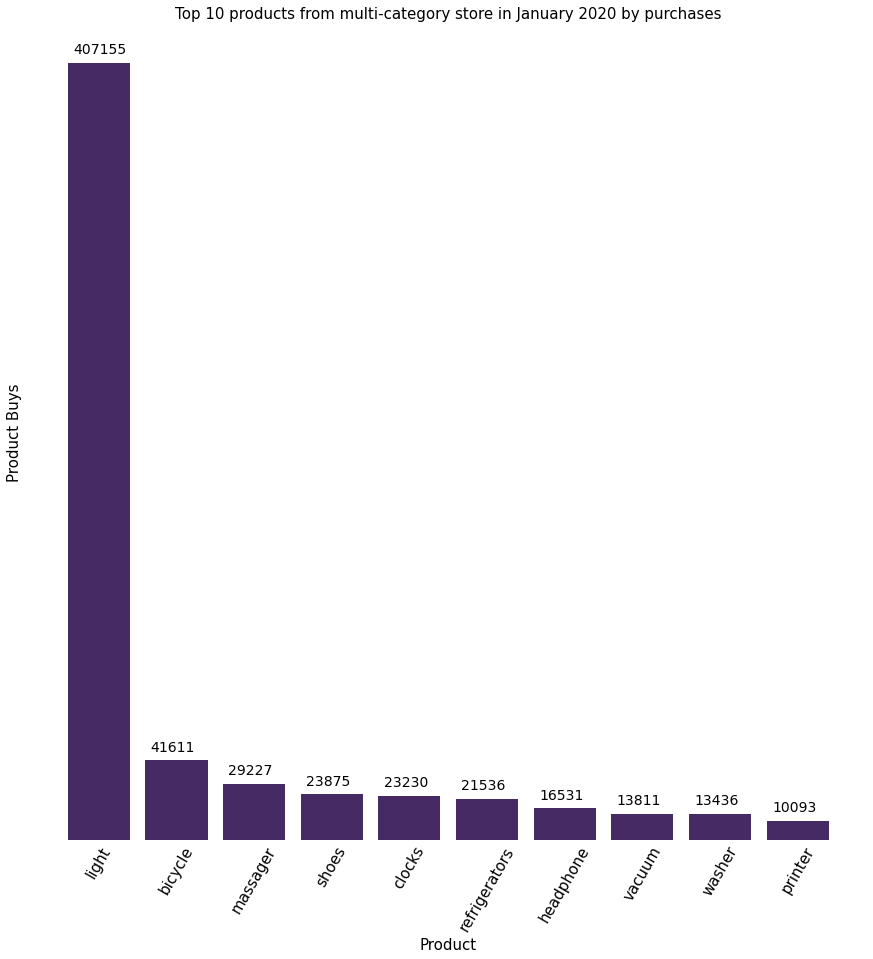

In [10]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['january']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(70/255, 42/255, 100/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in January 2020 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

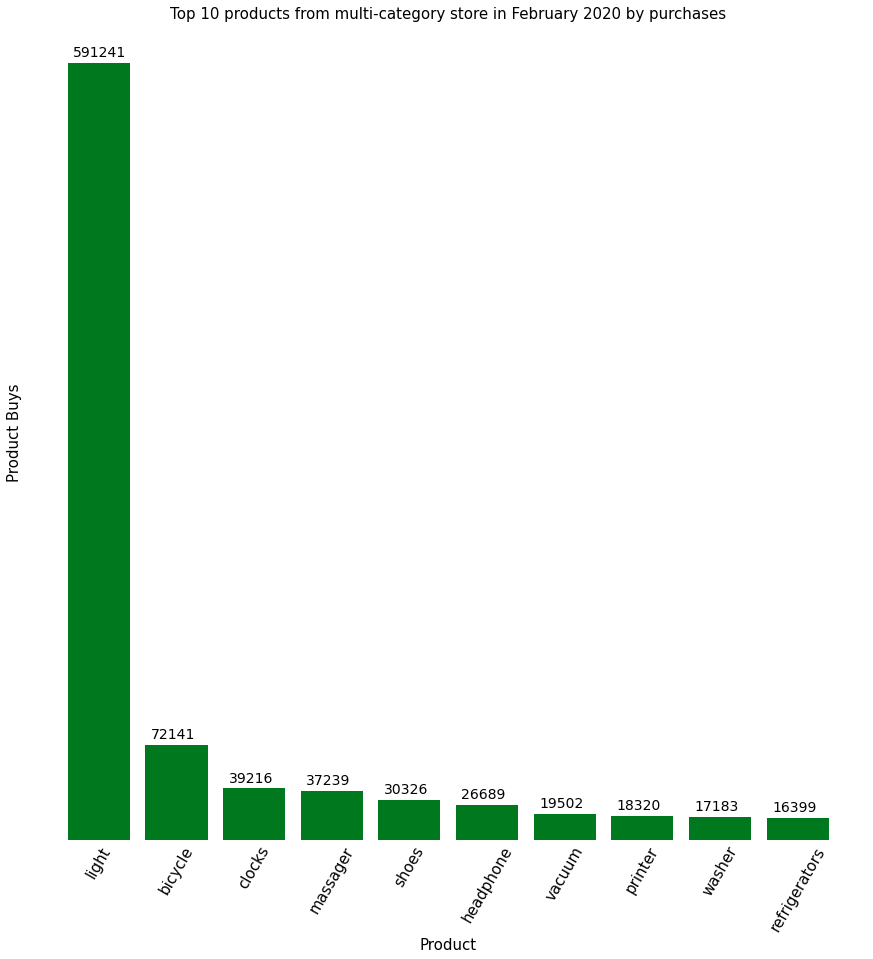

In [11]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['february']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(0/255, 120/255, 30/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in February 2020 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

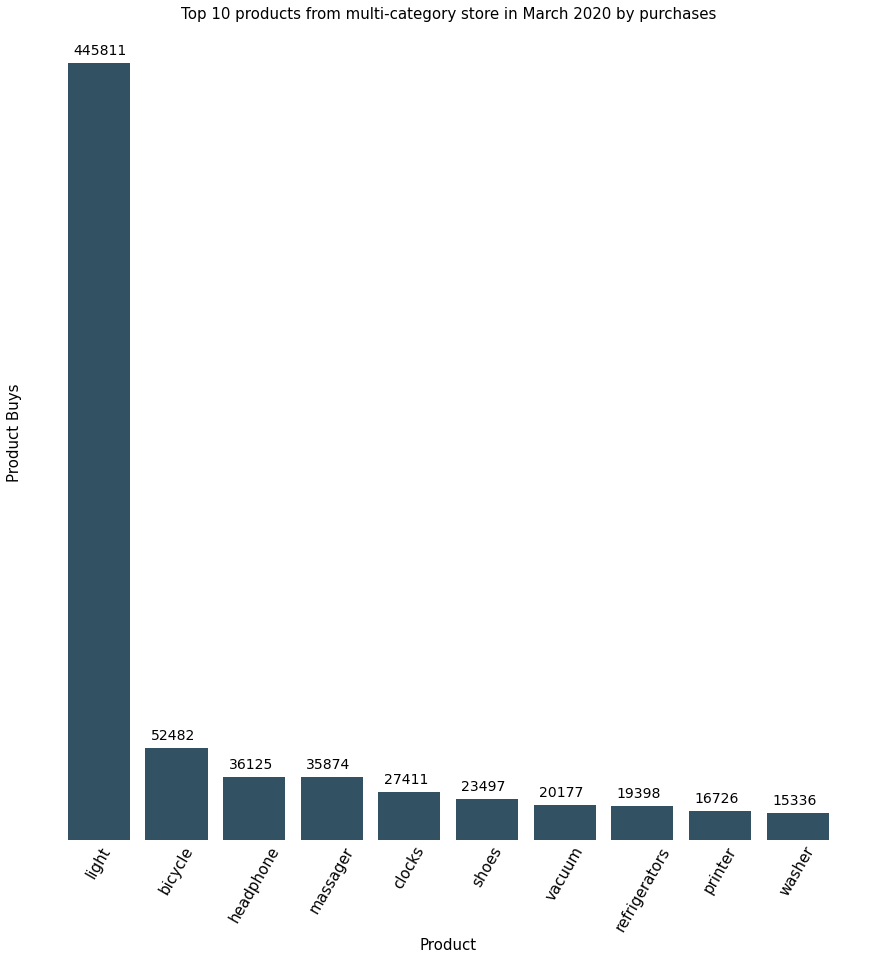

In [12]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['march']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(50/255, 82/255, 100/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in March 2020 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

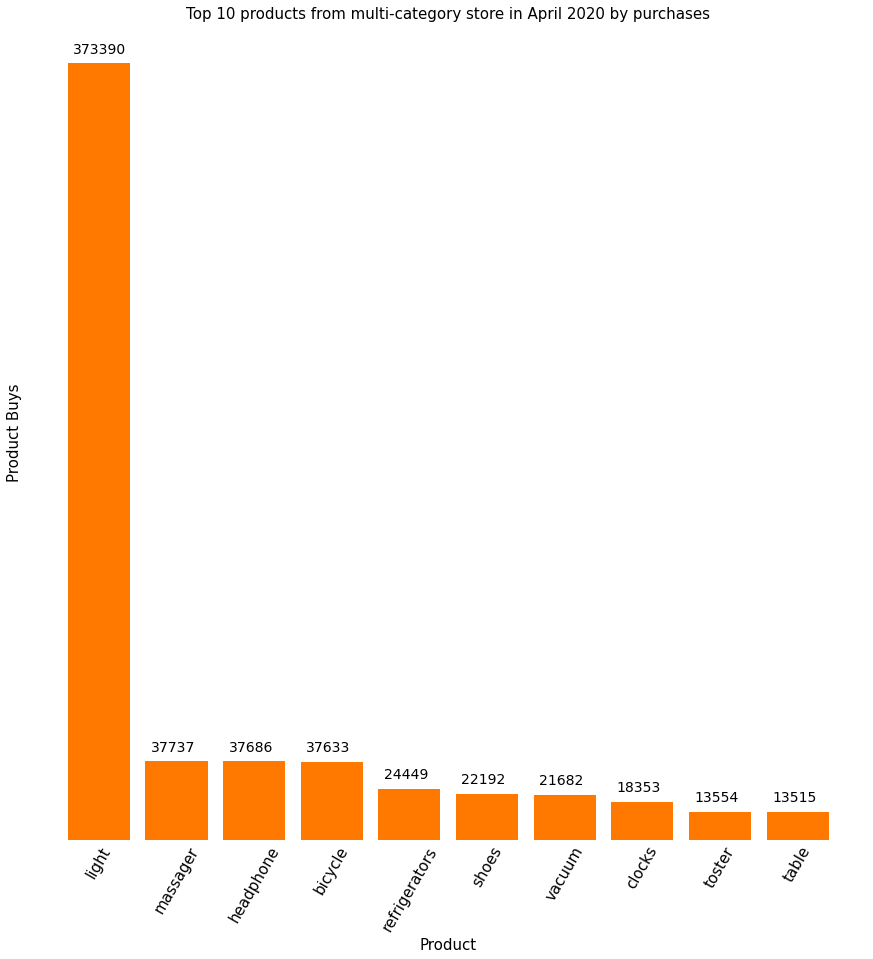

In [13]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = months['april']['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(255/255, 120/255, 0/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store in April 2020 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.33, v+5000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

### Concatenating all month dataframes into one

In [14]:
all_months = pd.DataFrame()
for month, data in months.items():
    all_months = pd.concat([data, all_months], axis=0)

In [15]:
all_months.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,subcategory
0,2020-03-01 00:00:07,purchase,5100722,2232732103101907535,electronics.clocks,huawei,128.68,604860058,f558a7d7-f1e4-4b81-8799-9131a81e551b,clocks
1,2020-03-01 00:00:42,purchase,100082062,2232732102103663163,furniture.bedroom.blanket,arg,48.88,601908129,37473d3f-b68b-4a23-8140-c6a7dece087c,blanket
2,2020-03-01 00:01:11,purchase,5100610,2232732103101907535,electronics.clocks,apple,295.73,613253847,45aa30e5-2e05-4d56-ab56-07b0ecd2a0a4,clocks
3,2020-03-01 00:01:29,purchase,1002544,2232732093077520756,construction.tools.light,apple,397.10,622090486,a91bed93-c586-453f-bbef-74c564fc0bfe,light
4,2020-03-01 00:02:00,purchase,1004767,2232732093077520756,construction.tools.light,samsung,241.83,621784978,50d5fceb-0eee-4733-a52e-e7f00855f9f6,light


### Mapping the event_time to create a month column

In [16]:
month_map = {10:'october', 11:'november', 12:'december', 1:'january', 2:'february', 3:'march', 4:'april'}
all_months['month'] = all_months['event_time'].apply(lambda x: x.month)
all_months['month'] = all_months['month'].map(month_map)

all_months.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,subcategory,month
0,2020-03-01 00:00:07,purchase,5100722,2232732103101907535,electronics.clocks,huawei,128.68,604860058,f558a7d7-f1e4-4b81-8799-9131a81e551b,clocks,march
1,2020-03-01 00:00:42,purchase,100082062,2232732102103663163,furniture.bedroom.blanket,arg,48.88,601908129,37473d3f-b68b-4a23-8140-c6a7dece087c,blanket,march
2,2020-03-01 00:01:11,purchase,5100610,2232732103101907535,electronics.clocks,apple,295.73,613253847,45aa30e5-2e05-4d56-ab56-07b0ecd2a0a4,clocks,march
3,2020-03-01 00:01:29,purchase,1002544,2232732093077520756,construction.tools.light,apple,397.10,622090486,a91bed93-c586-453f-bbef-74c564fc0bfe,light,march
4,2020-03-01 00:02:00,purchase,1004767,2232732093077520756,construction.tools.light,samsung,241.83,621784978,50d5fceb-0eee-4733-a52e-e7f00855f9f6,light,march


### Visualizing concatenated data

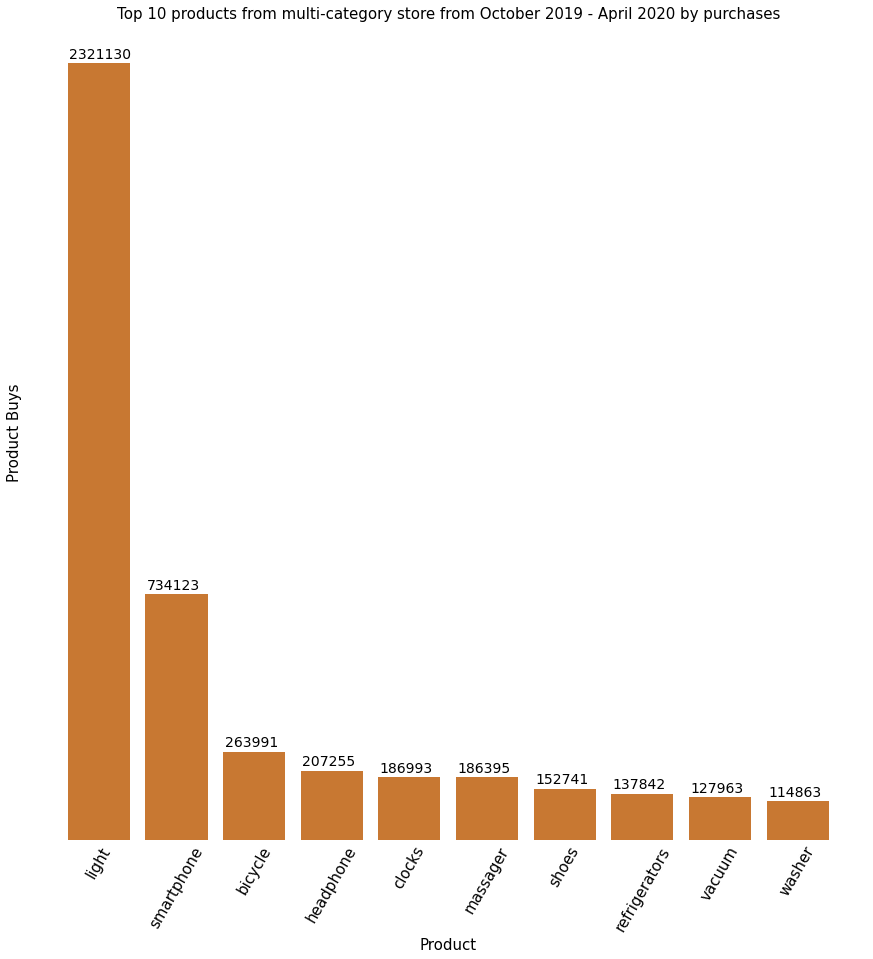

In [17]:
csfont = {'fontname':'Sans'}

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

top_bought_subcategories = all_months['subcategory'].value_counts()[:10]
ax.bar(top_bought_subcategories.index, list(top_bought_subcategories.values), color=(200/255, 120/255, 50/255))

ax.set_xticklabels(list(top_bought_subcategories.index), rotation=60, fontsize=15)
ax.set_xlabel('Product', fontsize=15)
ax.set_ylabel('Product Buys', fontsize=15)
ax.set_title('Top 10 products from multi-category store from October 2019 - April 2020 by purchases', fontsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticklabels([])

for key, spine in ax.spines.items():
    spine.set_visible(False)

for i, v in enumerate(list(top_bought_subcategories.values)):
    ax.text(i-.38, v+15000, str(v), color='black', fontsize=14, **csfont)
    
plt.show()

In [18]:
all_months[all_months['subcategory'] == 'light']['category_code'].value_counts()

construction.tools.light     2313086
furniture.universal.light       7947
auto.accessories.light            97
Name: category_code, dtype: int64

Looking at this frequency distribution of light subcategories we can see that the most popular kind of lights are lights for construction tools. with furniture, universal light then auto, accessories light behind.

Let's look more closely as to when lights blew up.

Text(0.5, 1.0, 'Light Purchases Each Month')

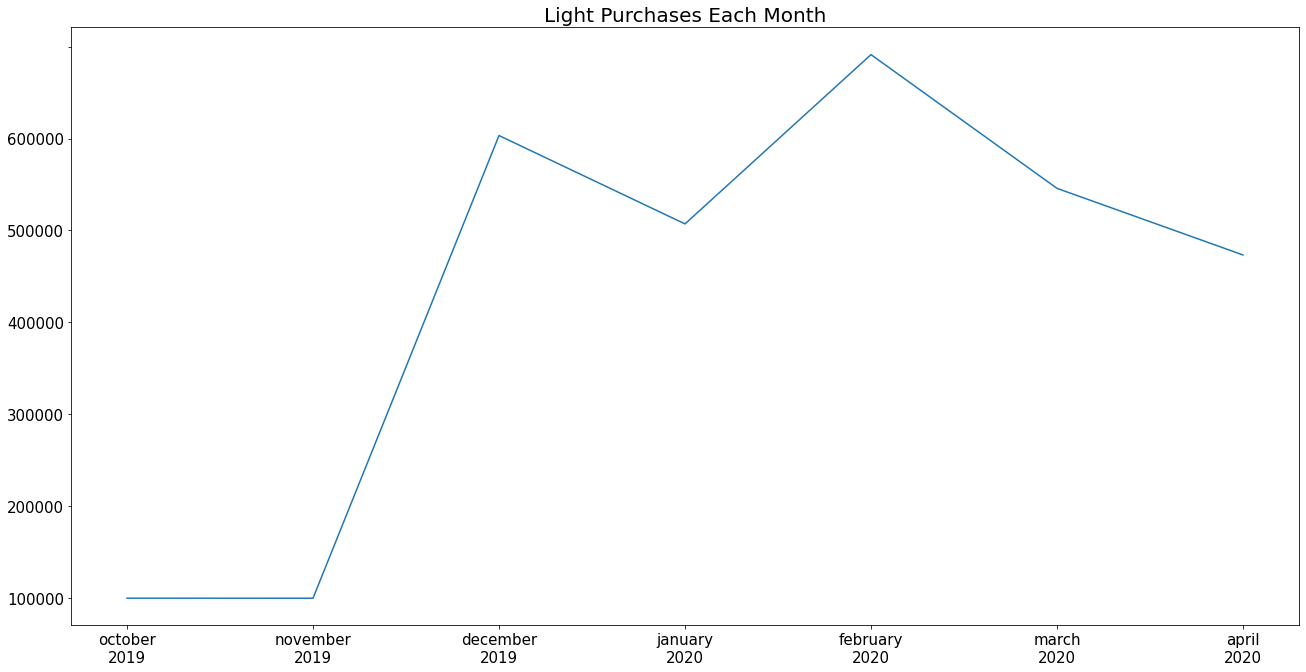

In [19]:
sub_cats_by_month_light = all_months[all_months['subcategory']=='light'].groupby('month').count()

sub_cats_by_month_light= sub_cats_by_month_light.loc[['october', 'november', 'december', 'january', 'february', 'march', 'april'], :]

fig, ax = plt.subplots(1, 1, figsize=(22, 11))

ax.plot(sub_cats_by_month_light.index, sub_cats_by_month_light['event_time'])

ax.set_xticklabels(['october\n2019', 'november\n2019', 'december\n2019', 'january\n2020', 'february\n2020','march\n2020', 'april\n2020'], fontsize=15)
ax.set_yticklabels(['0', '100000', '200000', '300000', '400000', '500000','600000'], fontsize=15)
ax.set_title('Light Purchases Each Month', fontsize=20)

From the line chart above we can see that from november to december lights start to grow more popular and peaked at february and it looks like it's going down from april 2020.

Let's also look at how this would affect the rest of the purchases for the months.

Text(0.5, 1.0, 'Total Purchases Each Month')

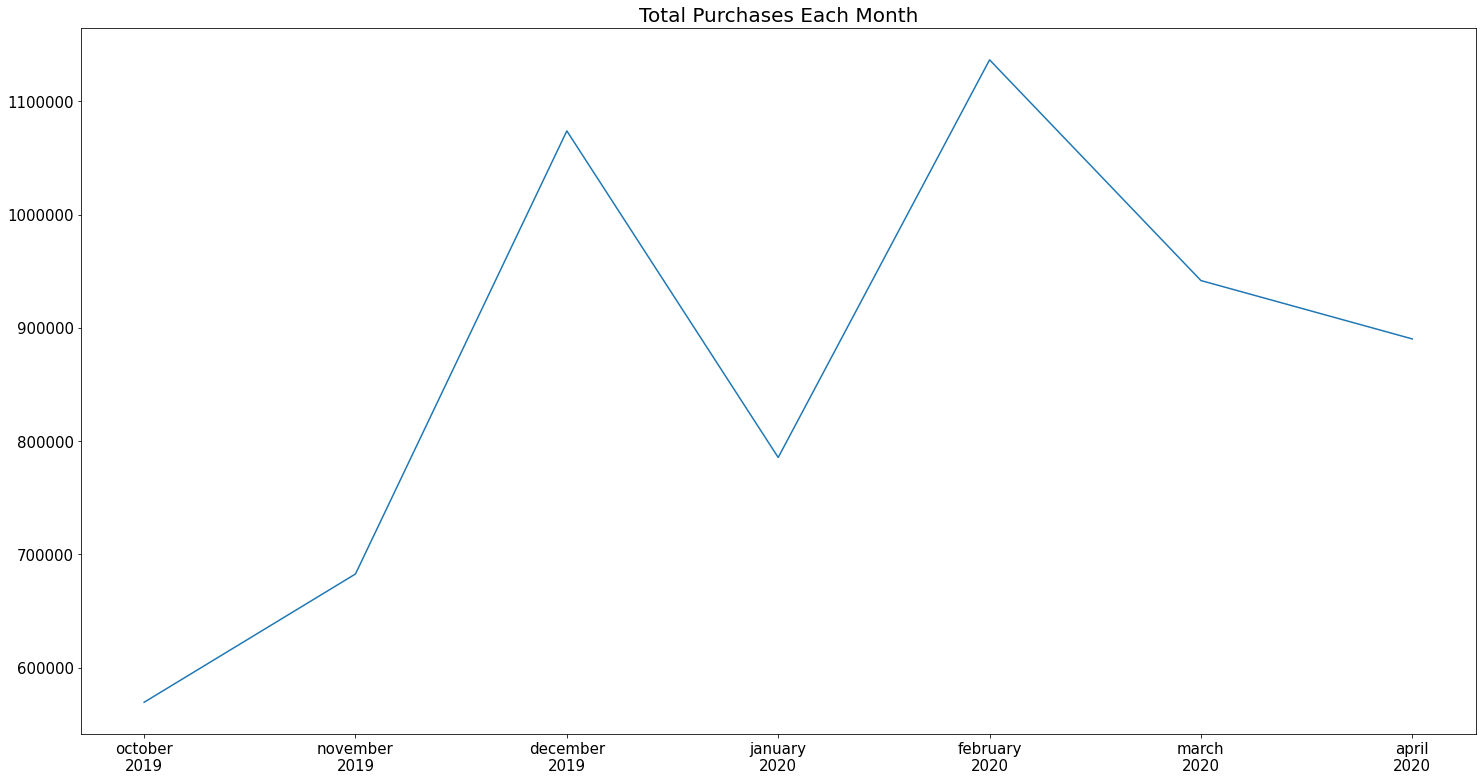

In [22]:
count = all_months.groupby('month').count()

count = count.loc[['october', 'november', 'december', 'january', 'february', 'march', 'april'], :]

fig, ax = plt.subplots(1, 1, figsize=(25, 13))
ax.plot(count.index, count['event_time'])
ax.set_xticklabels(['october\n2019', 'november\n2019', 'december\n2019', 'january\n2020', 'february\n2020','march\n2020', 'april\n2020'], fontsize=15)
ax.set_yticklabels(['0', '600000', '700000', '800000', '900000', '1000000','1100000'], fontsize=15)
ax.set_title('Total Purchases Each Month', fontsize=20)

We can see from the line chart above that the light purchases and the overall purchase shape are very similar. The light purchases must have greatly influenced the overall purchases.

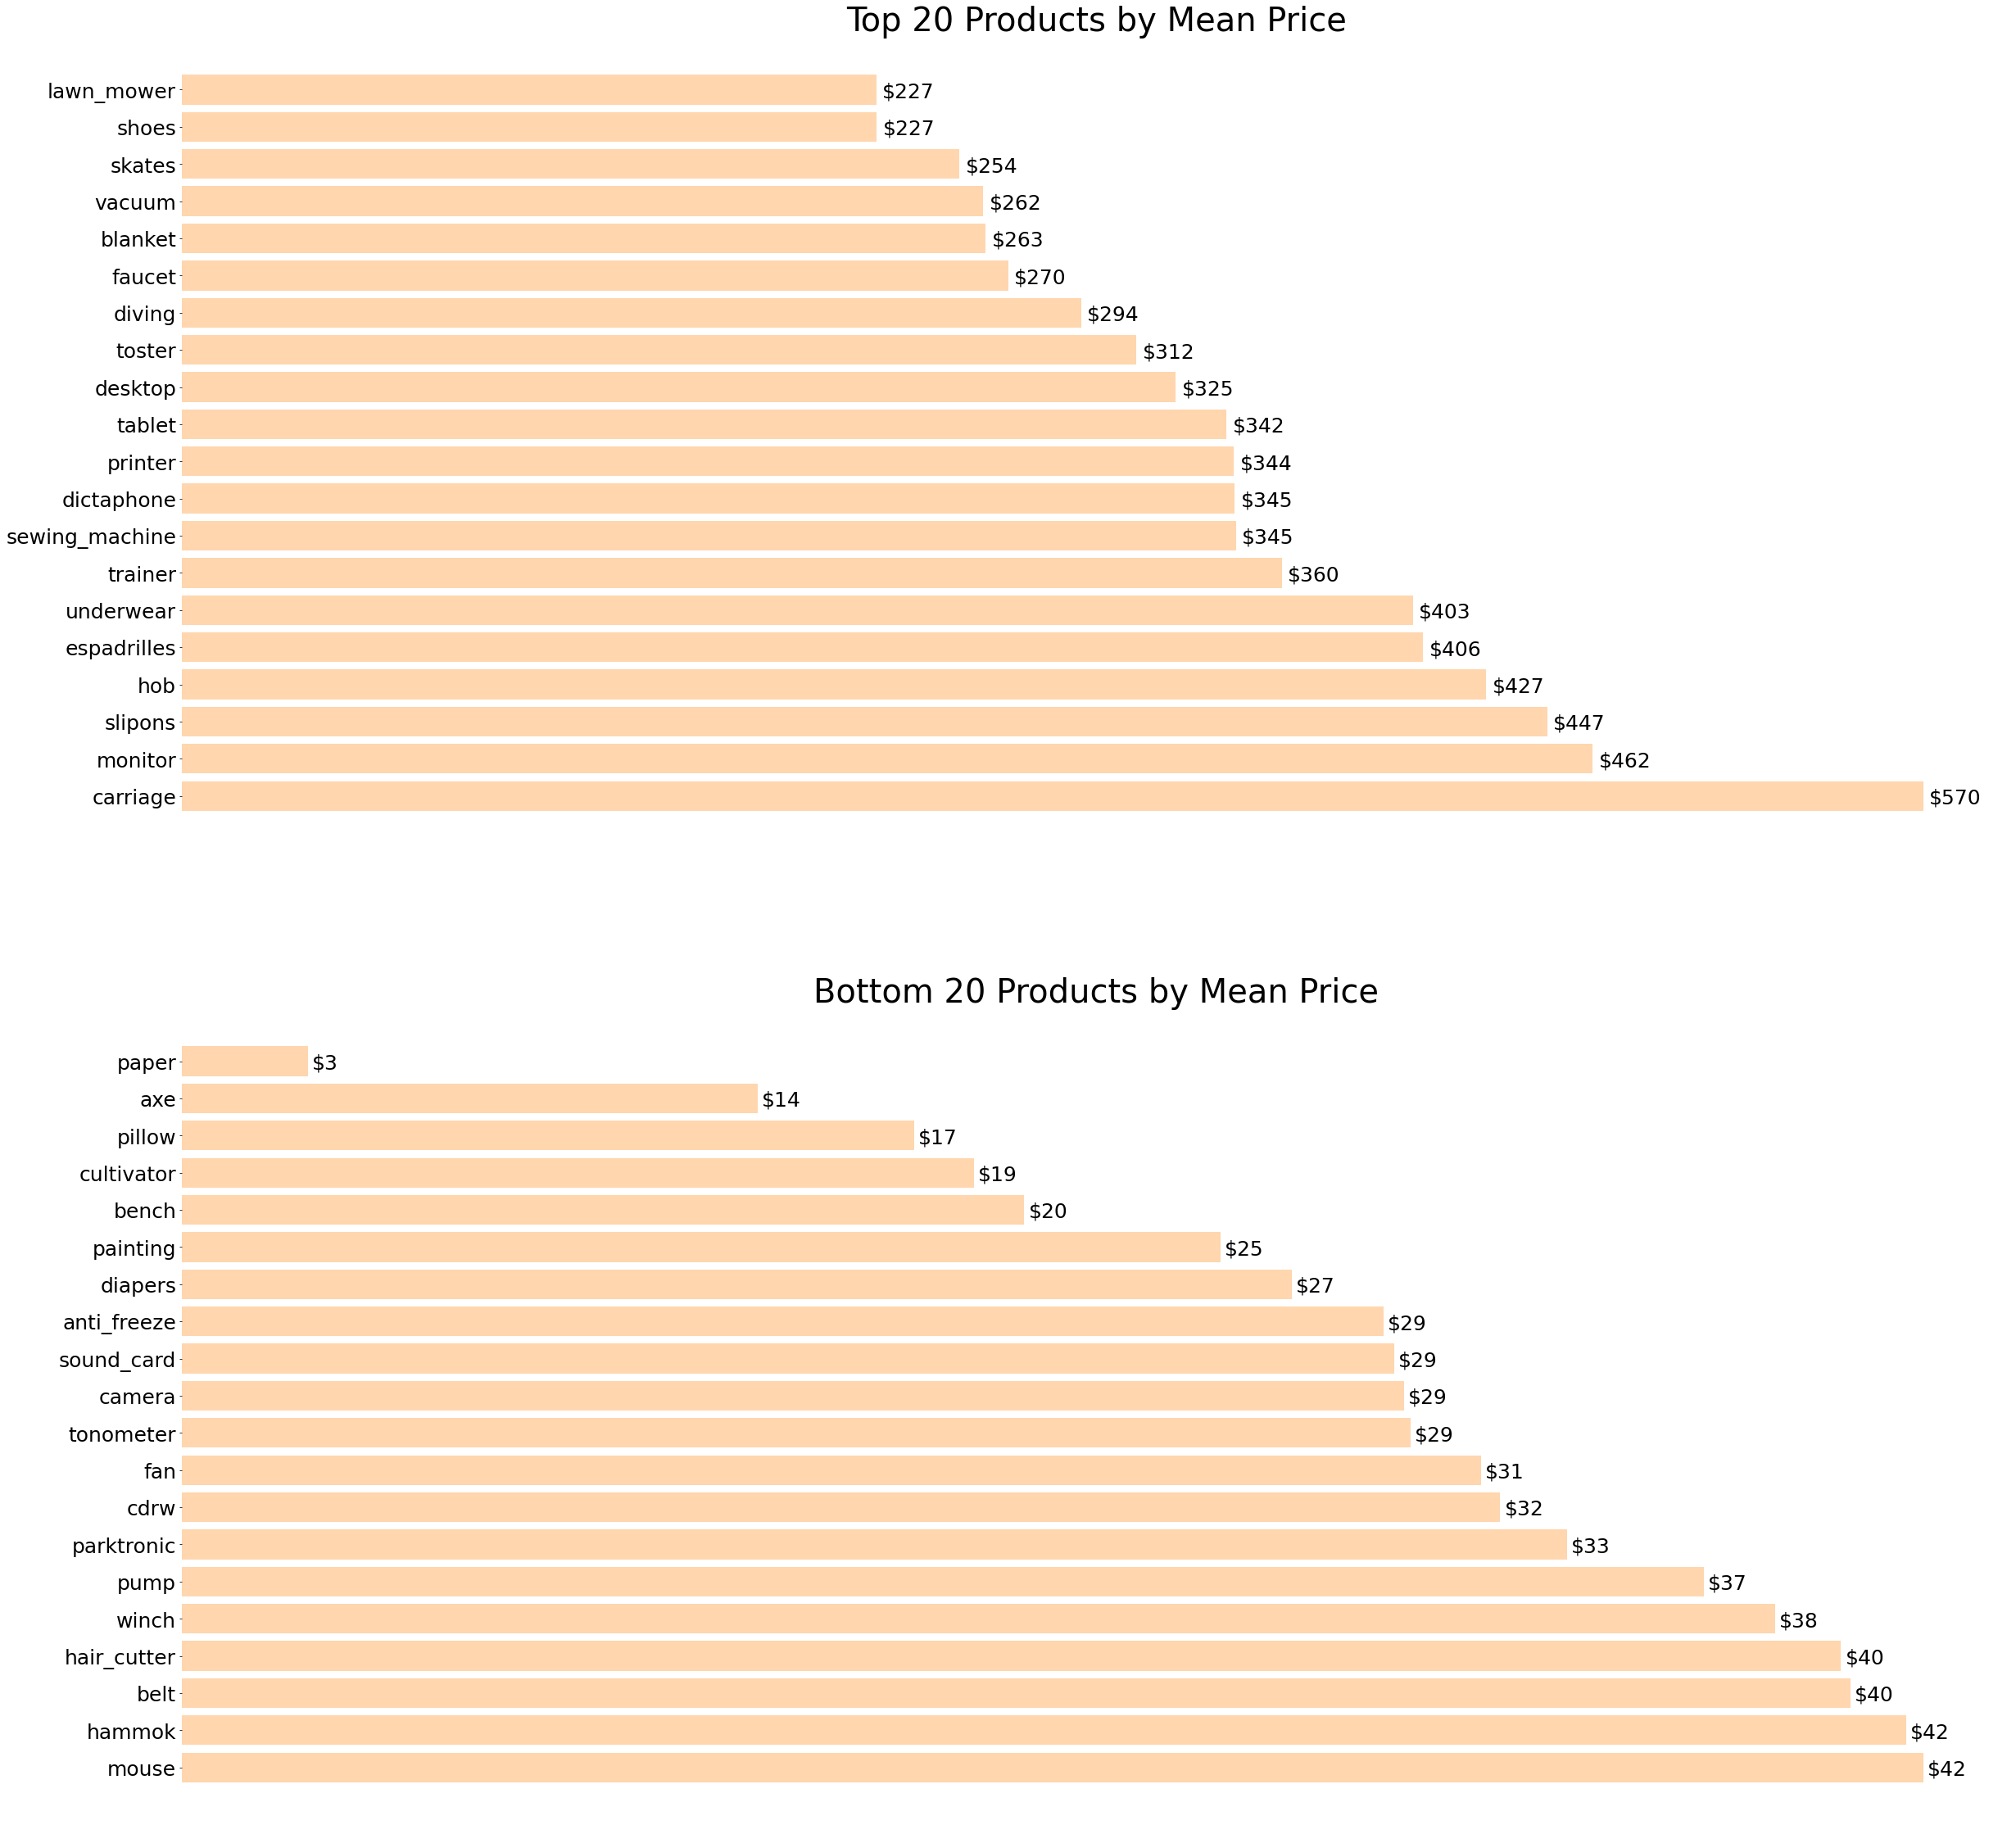

In [23]:
sub_cats_by_mean = all_months[['subcategory', 'price']].groupby('subcategory').describe().sort_values(by=[('price',  'mean')], ascending=False)

sub_cats_by_mean.columns = sub_cats_by_mean.columns.droplevel()

fig, ax = plt.subplots(2, 1, figsize=(40, 40))
ax[0].barh(sub_cats_by_mean[:20].index, sub_cats_by_mean[:20]['mean'], color=(255/255, 188/255, 121/255), alpha=0.6)
ax[0].set_title('Top 20 Products by Mean Price', fontsize=40)
ax[0].set_xticklabels([])
ax[0].set_yticklabels(sub_cats_by_mean[20:].index, fontsize=25)
ax[0].set_xticks([])

for i, v in enumerate(list(sub_cats_by_mean[:20]['mean'])):
    ax[0].text(v+2, i-0.2, '$'+str(int(v)), color='black', fontsize=25)
    
for key, spine in ax[0].spines.items():
    spine.set_visible(False)

ax[1].barh(sub_cats_by_mean[-20:].index, sub_cats_by_mean[-20:]['mean'], color=(255/255, 188/255, 121/255), alpha=0.6)
ax[1].set_title('Bottom 20 Products by Mean Price', fontsize=40)
ax[1].set_xticklabels([])
ax[1].set_yticklabels(sub_cats_by_mean[-20:].index, fontsize=25)
ax[1].set_xticks([])

for i, v in enumerate(list(sub_cats_by_mean[-20:]['mean'])):
    ax[1].text(v+0.1, i-0.2, '$'+str(int(v)), color='black', fontsize=25)
    
for key, spine in ax[1].spines.items():
    spine.set_visible(False)

Just an extra visualization to see the cheapest products and the most expensive products from all months

### Now let's look at the time of day people purchased products

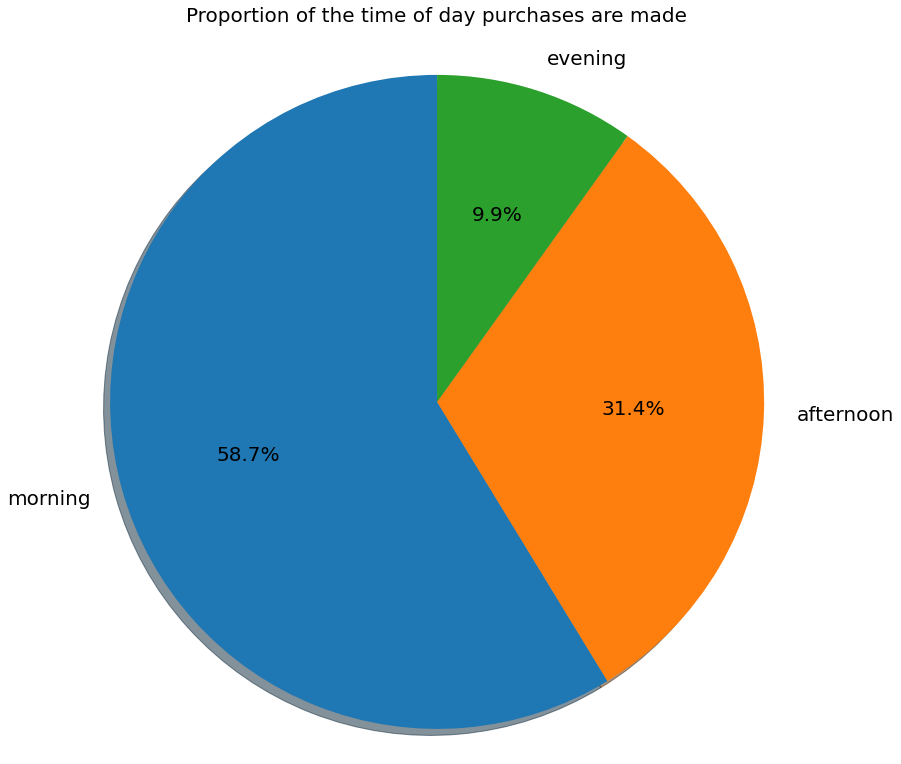

In [24]:
def process_time(intime):
    if dt.time(hour=0) <= intime <= dt.time(hour=11, minute=59):
        return 'morning'
    elif dt.time(hour=12) <= intime <= dt.time(hour=17, minute=59):
        return 'afternoon'
    else:
        return 'evening'
    
all_months['time_of_day'] = all_months['event_time'].apply(lambda x: process_time(x.time()))    

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(1, 1, figsize=(13, 13))
ax.pie(all_months['time_of_day'].value_counts().values, labels=all_months['time_of_day'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Proportion of the time of day purchases are made\n', fontsize=20)

plt.show()

From this pie chart above we can see that majority of people like to purchase their products in the morning.

It looks like from the line chart above february 2020 racked up the most purchases out of all the months.

### Now let's look at how each market was and how much their most popular product influenced the purchases in that market

In [27]:
def split_category(c_code):
    return c_code.split('.')[0]

all_months['market'] = all_months['category_code'].apply(lambda x: split_category(x))

In [28]:
data_market = all_months.groupby('market').count()

data_market.reset_index(level=0, inplace=True)


def find_market_sales(market):
    market_sales = len(all_months[all_months['market'] == market])
    return market_sales

def find_highest_product_purchases(market):
    market_sales = all_months[all_months['market'] == market]
    product_sales = max(market_sales['subcategory'].value_counts())
    return product_sales

data_market['market_sales'] = data_market['market'].apply(lambda x: find_market_sales(x))

data_market['product_purchases'] = data_market['market'].apply(lambda x: find_highest_product_purchases(x))

data_market['market_sales_diff'] = data_market['market_sales'] - data_market['product_purchases']

In [29]:
data_market.reset_index(inplace=True)

def find_highest_product(market):
    market_sales = all_months[all_months['market'] == market]
    product_sales = market_sales['subcategory'].value_counts().index[0]
    return product_sales

data_market['highest_product'] = data_market['market'].apply(lambda x: find_highest_product(x))

data_market = data_market.set_index('market')

data_market['highest_product']

market
accessories            bag
apparel              shoes
appliances        massager
auto            compressor
computers          printer
construction         light
country_yard    cultivator
electronics     smartphone
furniture          blanket
kids                  toys
medicine         tonometer
sport              bicycle
stationery        cartrige
Name: highest_product, dtype: object

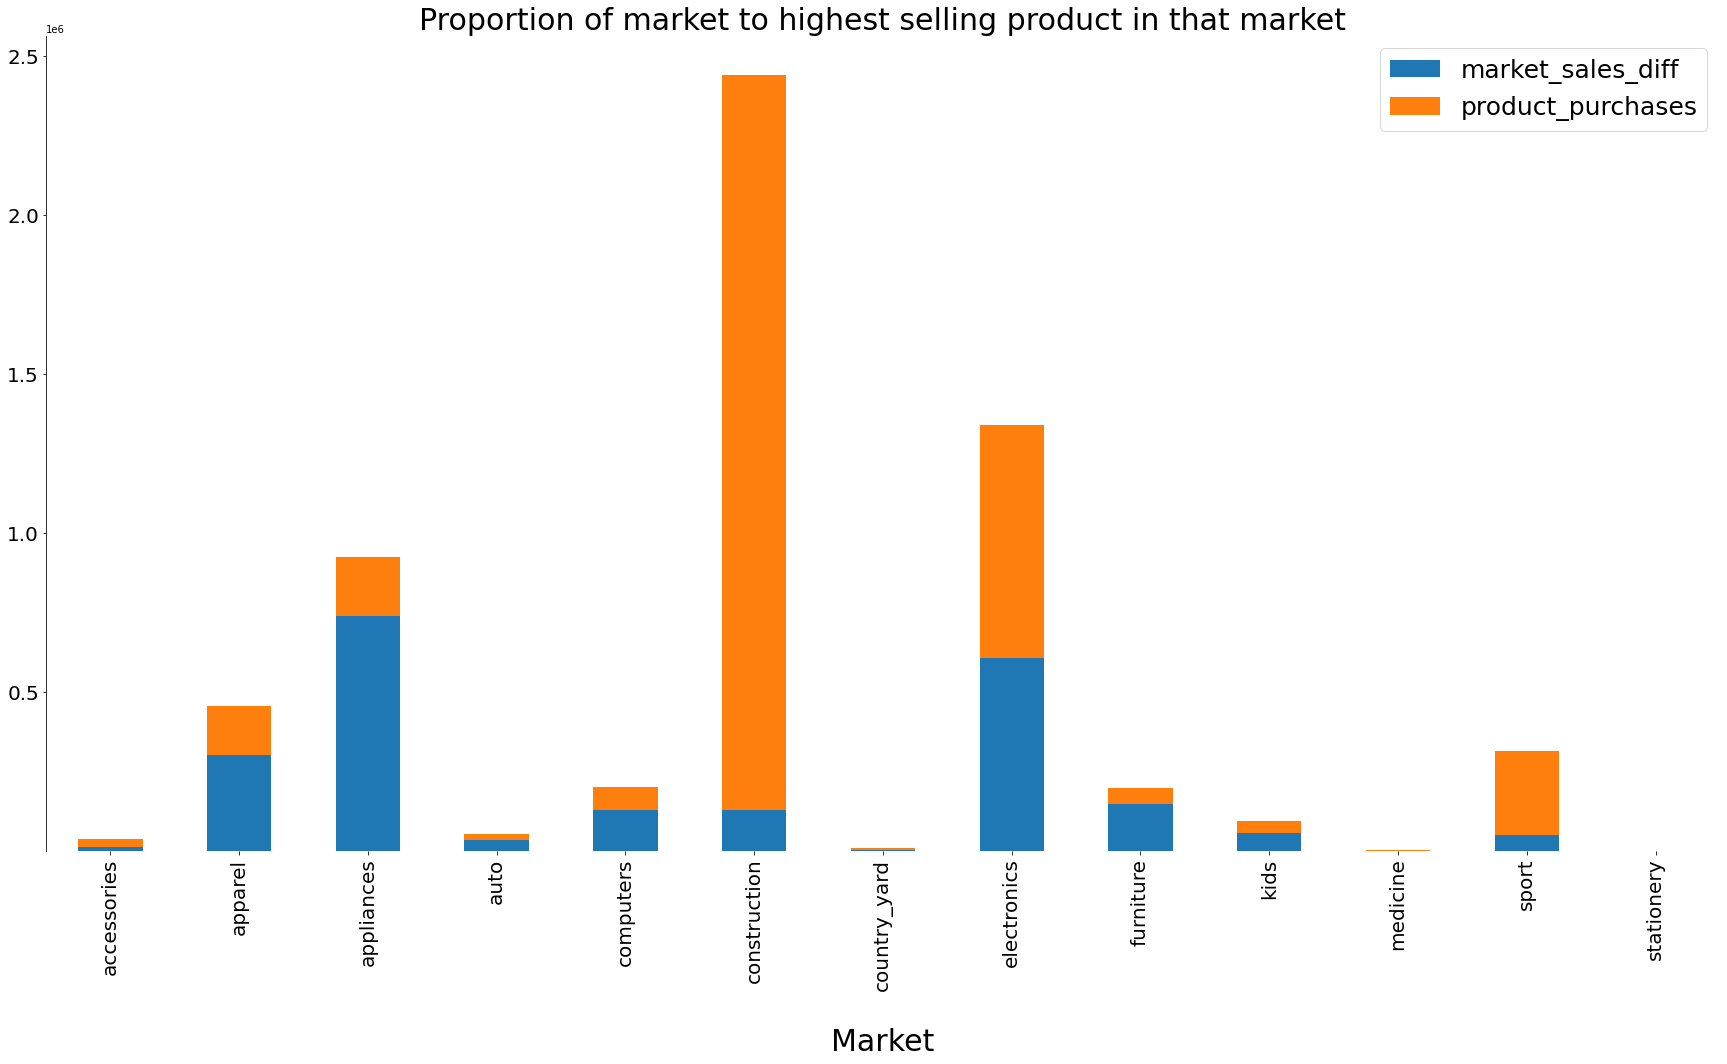

In [30]:
data_market[['market_sales_diff','product_purchases']].plot.bar(figsize=(30,15), stacked=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nMarket', fontsize=30)
plt.legend(prop={'size': 25})
plt.title('Proportion of market to highest selling product in that market', fontsize=30)

for pos in ['right','top','bottom']:
    plt.gca().spines[pos].set_visible(False)

From the graph above it is apparent that these products are a big part of their market:
 - Light (construction)
 - Smartphones (electronics)
 - Bicycles (sport)

# Conclusion

To wrap up this EDA let's look at what insights we have found:
 - To my surprise we found a sudden burst of popularity from lights which could be the result of a certain event that occurred in the area that the data came from (See kaggle page for more details on origin of data).
 - We found that february racked up the most purchases from all the months.
 - We found that people like to purchase thier products in the morning.
 - We also found that's light's, smartphone's and bicycles have a big influence on their market.

That's it for this EDA please if you have any feedback let me know.